In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


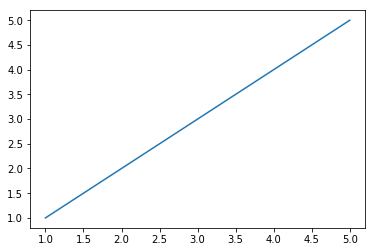

In [2]:
# array
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])

fig, ax = plt.subplots()
# create a simple line plot
ax.plot(x, y)

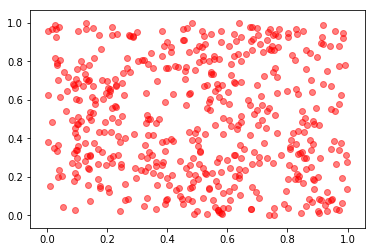

In [3]:
# scatterplot
N = 500
x = np.random.rand(N)
y = np.random.rand(N)

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, c="red")

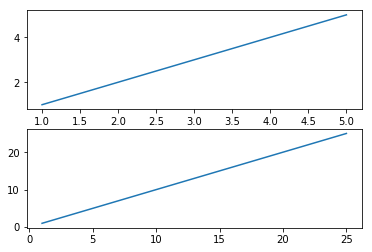

In [4]:
# create two plots
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])

fig, axes = plt.subplots(nrows=2, ncols=1)

axes[0].plot(x, y)
axes[1].plot(x*x, y*y)

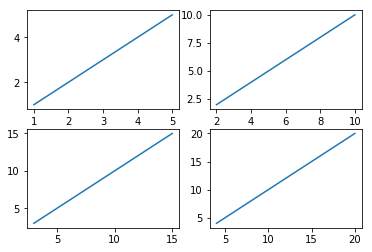

In [5]:
# 2x2 plot
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].plot(x,y)
axes[0,1].plot(x*2,y*2)
axes[1,0].plot(x*3,y*3)
axes[1,1].plot(x*4,y*4)

In [ ]:
###### histogram

In [6]:
file_location = "/Users/mingchang/Downloads/"
file_name = "BA501_python_data.csv"
my_data = pd.read_csv(file_location + file_name)

my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [7]:
my_series_jp = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "JP")]
my_series_us = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "US")]

Text(0.5,0,'Spend')

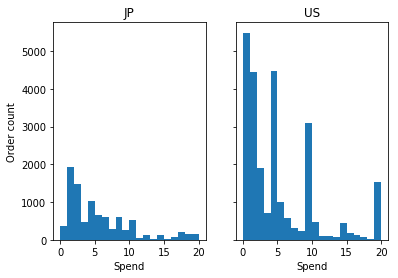

In [8]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].hist(my_series_jp, bins=20)
ax[1].hist(my_series_us, bins=20)

ax[0].set_title("JP")
ax[1].set_title("US")

ax[0].set_ylabel("Order count")
ax[0].set_xlabel("Spend")
ax[1].set_xlabel("Spend")

(array([1.600e+01, 7.000e+01, 5.906e+03, 8.980e+02, 3.060e+03, 3.380e+02,
        6.400e+01, 1.578e+03, 7.100e+01, 5.620e+02, 5.000e+01, 3.800e+01,
        4.414e+03, 4.670e+02, 5.120e+02, 4.700e+01, 6.100e+01, 4.940e+02,
        6.500e+01, 2.210e+02, 7.000e+00, 5.000e+01, 1.890e+02, 7.900e+01,
        3.003e+03, 7.000e+01, 2.860e+02, 1.230e+02, 2.300e+01, 7.700e+01,
        7.000e+00, 1.000e+01, 9.000e+01, 1.400e+01, 4.300e+01, 3.000e+00,
        7.000e+00, 4.370e+02, 9.000e+00, 1.600e+02, 8.200e+01, 1.300e+01,
        3.700e+01, 1.100e+01, 5.400e+01, 1.100e+01, 1.000e+00, 1.400e+01,
        2.000e+00, 1.542e+03]),
 array([1.00000e-02, 4.09600e-01, 8.09200e-01, 1.20880e+00, 1.60840e+00,
        2.00800e+00, 2.40760e+00, 2.80720e+00, 3.20680e+00, 3.60640e+00,
        4.00600e+00, 4.40560e+00, 4.80520e+00, 5.20480e+00, 5.60440e+00,
        6.00400e+00, 6.40360e+00, 6.80320e+00, 7.20280e+00, 7.60240e+00,
        8.00200e+00, 8.40160e+00, 8.80120e+00, 9.20080e+00, 9.60040e+00,
        1.0

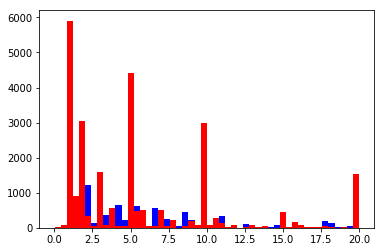

In [9]:
fig, ax = plt.subplots()
ax.hist(my_series_jp, bins=50, color='blue')
ax.hist(my_series_us, bins=50, color='red')

In [ ]:
###### time series

In [10]:
import datetime

In [11]:
my_data.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [12]:
# goal: compare revenue performance between red and blue
np.unique(my_data["experiment_id"])
red_button = np.unique(my_data["experiment_id"])[0]
blue_button = np.unique(my_data["experiment_id"])[1]

In [13]:
red_button, blue_button

(12624548, 12624549)

In [14]:
red_button_data = my_data[['date','spend_usd']][my_data.experiment_id == red_button]

In [15]:
red_button_data.head()

,date,spend_usd
0,20170402,16.138855
2,20170404,19.887087
3,20170403,19.990000
5,20170406,10.641677
6,20170406,9.990000


In [16]:
my_ts = red_button_data.groupby('date')['spend_usd'].sum()
# select date, sum(revenu) from table group by 1 order by 1;

In [17]:
my_ts

date
20170401    84017.341822
20170402    53431.524779
20170403    53108.682338
20170404    45632.486579
20170405    51385.158293
20170406    47416.378814
20170407    62078.287834
Name: spend_usd, dtype: float64

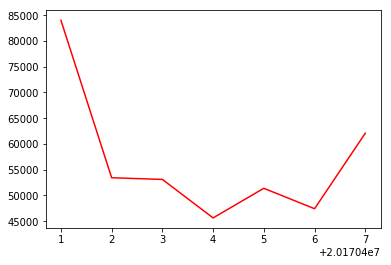

In [18]:
fig, ax = plt.subplots()
ax.plot(my_ts, c= "red")

In [19]:
my_data.date = pd.to_datetime(my_data.date, format='%Y%m%d')
my_data.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


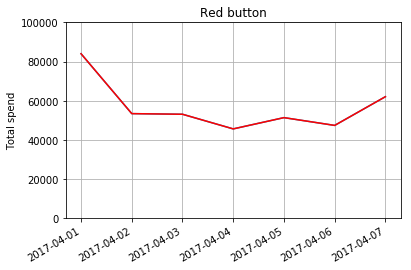

In [20]:
red_button_data = my_data[['date','spend_usd']][my_data.experiment_id == red_button]
my_ts = red_button_data.groupby('date')['spend_usd'].sum()

fig, ax = plt.subplots()
ax.plot(my_ts)
ax.plot(my_ts, c= "red")
plt.gcf().autofmt_xdate()

ax.set_ylim(0,100000)
ax.set_title("Red button")
ax.set_ylabel("Total spend")
#ax.set_xlabel("")
ax.grid(True, which="major")
ax.grid(True, which="both")


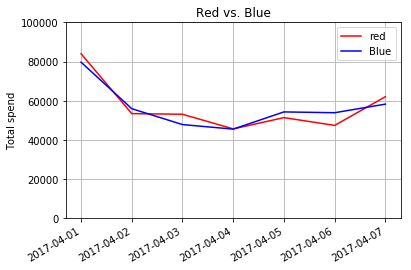

In [21]:
# subset the data
red_button_data = my_data[['date','spend_usd']][my_data.experiment_id == red_button]
blue_button_data = my_data[['date','spend_usd']][my_data.experiment_id == blue_button]

red_ts = red_button_data.groupby('date')['spend_usd'].sum()
blue_ts = blue_button_data.groupby('date')['spend_usd'].sum()

fig, ax = plt.subplots()
ax.plot(red_ts, color="red", label="red")
ax.plot(blue_ts, color="blue", label = "blue")

# some tweaks
ax.set_ylim(0,100000)
ax.set_title("Red vs. Blue")
ax.set_ylabel("Total spend")
ax.grid(True, which="both")
# change legend
ax.legend().get_texts()[0].set_text("Red")
ax.legend().get_texts()[1].set_text("Blue")
# format date
plt.gcf().autofmt_xdate()

In [ ]:
##### function

In [64]:
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [63]:
# for any given experiment_id, return a list group by date
def GetSeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby('date')['spend_usd'].sum()
    return(series)

In [71]:
# test if this works
blue = GetSeries(my_data, 12624548)
red = GetSeries(my_data, 12624549)
index_series = blue.index

In [67]:
blue

date
2017-04-01    79698.149014
2017-04-02    55951.937566
2017-04-03    47839.298116
2017-04-04    45516.828865
2017-04-05    54308.545056
2017-04-06    53889.940812
2017-04-07    58283.084721
Name: spend_usd, dtype: float64

In [68]:
# plot the time series
def PlotSeries(index_series, experiment_series, control_series):
    df = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = index_series.tolist(), # a range of dates
        columns = ["experiment", "control"]
    )
    fig, ax = plt.subplots()
    ax.plot(df.experiment, color="red", label="red")
    ax.plot(df.control, color="blue", label = "blue")
    # some tweaks
    ax.set_ylim(0,100000)
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total spend")
    ax.grid(True, which="both")
    # change legend
    ax.legend().get_texts()[0].set_text("Red")
    ax.legend().get_texts()[1].set_text("Blue")
    # format date
    plt.gcf().autofmt_xdate()

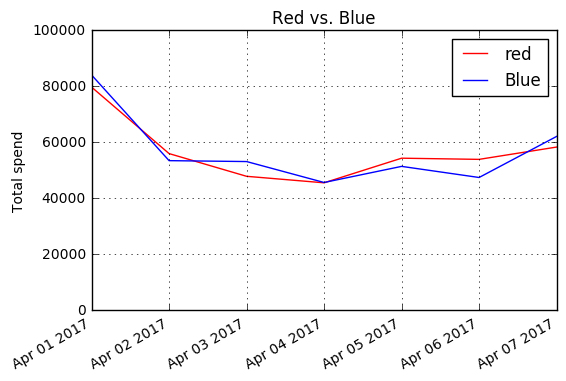

In [72]:
PlotSeries(index_series, red, blue)

In [73]:
# combine

In [76]:
def PrintDailyTimeSeries(my_data, experiment_ids):    
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetSeries(my_data, experiment_ids[0])
    control_series = GetSeries(my_data, experiment_ids[1])
    index_series = treatment_series.index
    
    PlotSeries(index_series, treatment_series, control_series)

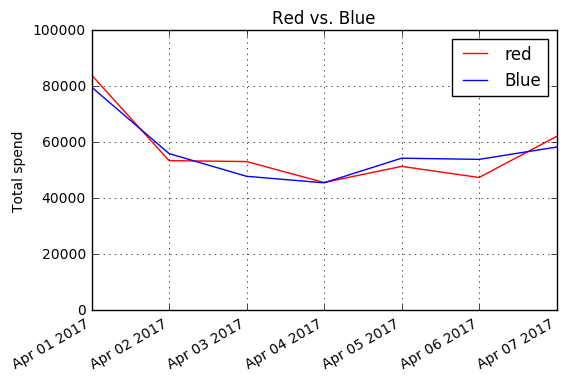

In [77]:
PrintDailyTimeSeries(my_data, [12624548,12624549])